In [1]:
import numpy as np
from scipy import stats

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Gumbel Softmax & the reparametrization trick



## Gumbel distribution

In [2]:
gumbel = tfd.Gumbel(0, 1)

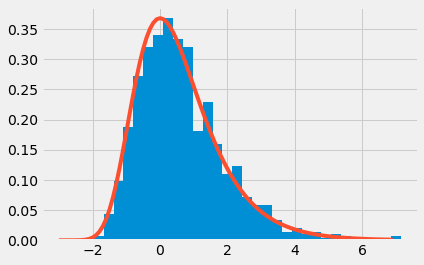

In [11]:
SAMPLE_SIZE = 1000
BINS = np.sqrt(SAMPLE_SIZE).astype('int')

x = np.arange(-3, 7, .1)

plt.hist(gumbel.sample(SAMPLE_SIZE).numpy(), bins=BINS, density=True)
plt.plot(x, gumbel.prob(x).numpy())
plt.show()

## Gumbel reparametrization

In [12]:
probs = [.7, .27, .03]

categorical = tfd.Categorical(probs=probs)
gumbel_softmax = tfd.RelaxedOneHotCategorical(.1, probs=probs)

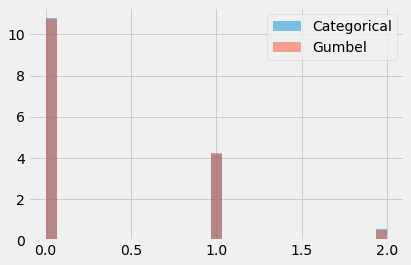

In [13]:
SAMPLE_SIZE = 1000
BINS = np.sqrt(SAMPLE_SIZE).astype('int')

sample_cat = categorical.sample(SAMPLE_SIZE)
sample_gs = tf.argmax(gumbel_softmax.sample(SAMPLE_SIZE), axis=1)

plt.hist(sample_cat.numpy(), bins=BINS, density=True, alpha=.5, label='Categorical')
plt.hist(sample_gs.numpy(), bins=BINS, density=True, alpha=.5, label='Gumbel')
plt.legend()
plt.show()

In [103]:
def lim_max(x, eps=.001):
    x = np.array(x)
    return eps * np.log(np.sum(np.exp(x / eps)))

In [104]:
x = [.01, .0004, .3, .1]
lim_max(x)

0.3

In [118]:
def logsumexp(x):
    return np.log(np.sum(np.exp(x)))

In [119]:
logsumexp([.01, .0004, .3, .1])

1.4963767052468482

In [92]:
np.exp(999)

C:\Users\aleks\AppData\Local\Temp/ipykernel_27596/1785582957.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(999)


inf

ET=1/λ and var(T)=1/λ2
.
T
has the same distribution as −(1/λ)logU, where U has a uniform distribution on [0,1], leading to a simple algorithm to sample T.

In [19]:
class Combi:
    
    def __init__(self, lmbd):
        self.lmbd = lmbd
        self.unif = tfd.Uniform(0, 1)
        
    def sample(self, n):
        return -(1 / lmbd) * tf.math.log(self.unif.sample(n))

In [36]:
lmbd = 8
n_samples = 1000
bins = np.sqrt(n_samples).astype('int') * 2

exp = tfd.Exponential(lmbd)
combi = Combi(lmbd)

In [37]:
sample_exp = exp.sample(1000).numpy()
sample_cmb = combi.sample(1000).numpy()

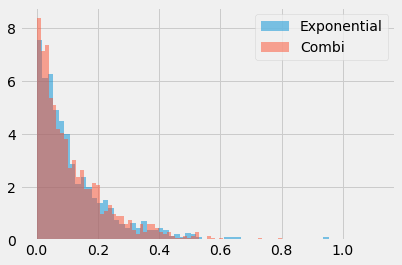

In [38]:
plt.hist(sample_exp, alpha=.5, label='Exponential', density=True, bins=bins)
plt.hist(sample_cmb, alpha=.5, label='Combi', density=True, bins=bins)
plt.legend()
plt.show()

In [98]:
res = []
for i in range(1000):
    alpha = np.array([1.0, 4.0, 6.0, 4.0, 1.0, 9.0])
    uniform = np.random.rand(6)
    gumbels = -np.log(-np.log(uniform)) + np.log(alpha)
    k = np.argmax(gumbels)
    res.append(k)

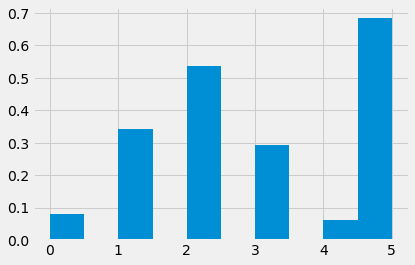

In [100]:
plt.hist(res, density=True)
plt.show()

In [128]:
def gumbel_pdf(z, loc, scale=1):
    return np.exp(-(z - loc) - np.exp(-(z - loc)))

def gumbel_cdf(z, loc, scale=1):
    return np.exp(-np.exp(-(z - loc)))

Text(0.5, 1.0, 'Gumbel PDF')

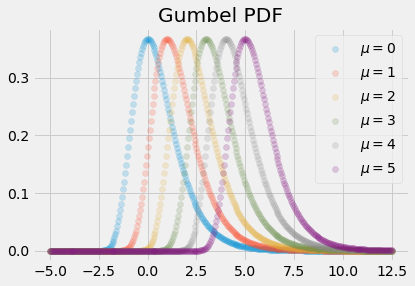

In [129]:
for i in range(6):
    x = np.arange(-5, 12.55, .05)
    plt.scatter(x, gumbel_pdf(x, i), label=f'$\mu={i}$', alpha=.2)
plt.legend()
plt.title('Gumbel PDF')

Text(0.5, 1.0, 'Gumbel CDF')

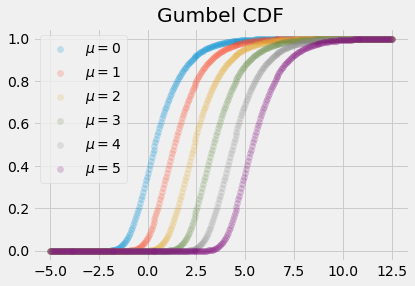

In [131]:
for i in range(6):
    x = np.arange(-5, 12.55, .05)
    plt.scatter(x, gumbel_cdf(x, i), label=f'$\mu={i}$', alpha=.2)
plt.legend()
plt.title('Gumbel CDF')

In [8]:
SAMPLE_SIZE = 100000
N_BINS = np.sqrt(SAMPLE_SIZE).astype(int)

In [16]:
def gumbel_transform(n):
    unif = tfd.Uniform(0, 1)
    u_samples = unif.sample(n).numpy()
    g_samples = -np.log(-np.log(u_samples))
    return g_samples

In [17]:
gumbel_true_sample = gumbel.sample(SAMPLE_SIZE).numpy()
gumbel_transfrom_sample = gumbel_transform(SAMPLE_SIZE)

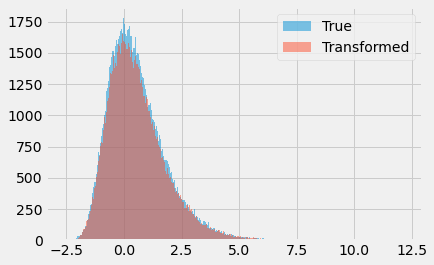

In [18]:
plt.hist(gumbel_true_sample, label='True', alpha=.5, bins=N_BINS)
plt.hist(gumbel_transfrom_sample, label='Transformed', alpha=.5, bins=N_BINS)
plt.legend()
plt.show()

In [195]:
def softmax(x, temp=.01):
    return (np.exp(x) / temp) / (np.sum(np.exp(x) / temp)) 

def get_gumbel_softmax(theta, eps=1e-12, temp=.01):
    samples = []
    samples.append(gumbel_transform(len(theta)) + np.log(np.array(theta) + eps))
    return softmax(samples, temp)

In [206]:
smpls = []
for i in range(100):
    
    smpls.append(np.argmax(get_gumbel_softmax([.38, .21, .99, .9], temp=.01)))

(array([16.,  0.,  0., 10.,  0.,  0., 40.,  0.,  0., 34.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

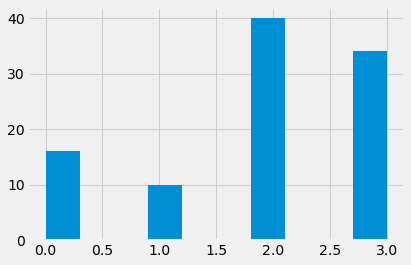

In [207]:
plt.hist(smpls)